HYPOTHESIS 2 : Test if power usage varies significantly across different hours of the day.


The null and alternate hypotheses are:

H₀: Power usage is independent of the hour of the day
H₁: Power usage is dependent on the hour of the day

For testing whether there is high usage during particular hours (comparing power usage across different hours of the day), we can use a Chi-square test for Independence  Since we're comparing categorical data (hours) with continuous data (power usage), and we want to test if the power usage is dependent on the hour of the day, a Chi-square test for Independence would be appropriate.


The chi-square test is appropriate here because:

We're testing the relationship between a categorical variable (hour) and another categorical variable (power usage categories)
We have independent observations
We have sufficient sample size
The data can be organized into a contingency table

The visualization will help us identify specific patterns in hourly usage, while the statistical test will tell us if these patterns are significant.



Chi-square Test Results:
----------------------
Chi-square statistic: 442158.7305
p-value: 0.0000
Degrees of freedom: 69

Interpretation:
--------------
Reject the null hypothesis.
There is significant evidence that power usage depends on the hour of the day.

Peak usage hours:
Hour 21: 1.569 kW
Hour 20: 1.554 kW
Hour 7: 1.426 kW


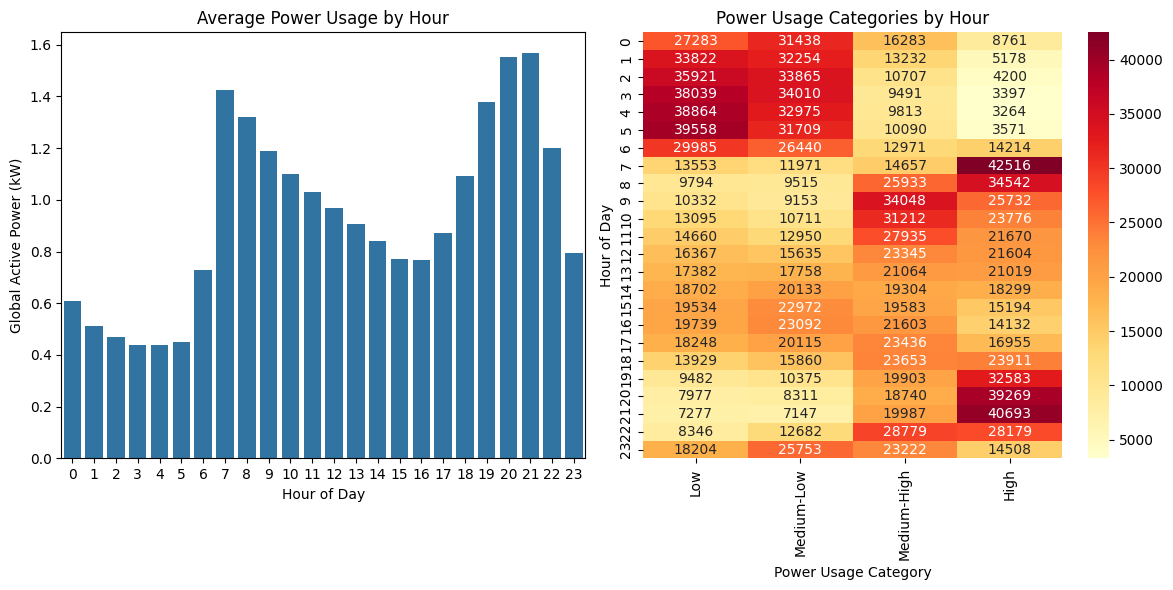

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv('data_processed.csv')


def analyze_hourly_usage(df):

    hourly_avg = df.groupby('hour')['Global_active_power'].mean().reset_index()
    
    # For chi-square test, we need to categorize the power usage
    # categories based on quartiles
    df['power_category'] = pd.qcut(df['Global_active_power'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
    
    # contingency table
    contingency_table = pd.crosstab(df['hour'], df['power_category'])
    
    # chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    
    plt.figure(figsize=(12, 6))
    
    # Plot 1: Average power usage by hour
    plt.subplot(1, 2, 1)
    sns.barplot(x='hour', y='Global_active_power', data=hourly_avg)
    plt.title('Average Power Usage by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Global Active Power (kW)')
    
    # Plot 2: Heatmap of power categories
    plt.subplot(1, 2, 2)
    sns.heatmap(contingency_table, cmap='YlOrRd', annot=True, fmt='d')
    plt.title('Power Usage Categories by Hour')
    plt.xlabel('Power Usage Category')
    plt.ylabel('Hour of Day')
    
    results = {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'contingency_table': contingency_table,
        'hourly_averages': hourly_avg
    }
    
    return results

results = analyze_hourly_usage(df)

print("\nChi-square Test Results:")
print("----------------------")
print(f"Chi-square statistic: {results['chi2_statistic']:.4f}")
print(f"p-value: {results['p_value']:.4f}")
print(f"Degrees of freedom: {results['degrees_of_freedom']}")

print("\nInterpretation:")
print("--------------")
if results['p_value'] < 0.05:
    print("Reject the null hypothesis.")
    print("There is significant evidence that power usage depends on the hour of the day.")
    
    peak_hours = results['hourly_averages'].nlargest(3, 'Global_active_power')
    print("\nPeak usage hours:")
    for _, row in peak_hours.iterrows():
        print(f"Hour {int(row['hour'])}: {row['Global_active_power']:.3f} kW")
else:
    print("Fail to reject the null hypothesis.")
    print("There is insufficient evidence that power usage depends on the hour of the day.")


plt.tight_layout()
plt.show()